# NEW ZEALAND TIDE GAUGE DATA ANALYSIS

Emma Skelton

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlopen
import numpy as np
from scipy.stats import linregress

In [2]:
import matplotlib

In [3]:
#sets to original matplotlib plot style after importing seaborn package
matplotlib.rc_file_defaults()

PSMSL NZ stations ID#s:
NORTH ISLAND:
* Napier = 1750
* Gisborne = 1613
* Auckland-Waitemata Harbour = 217
* Auckland II = 150
* Wellington Harbour - 221
* Wellington II = 500


SOUTH ISLAND
* Lyttleton = 247
* lyttleton II (Christchurch)= 259
* Westport = 1004
* Port Chalmers (Dunedin) = 1643
* Timaru = 998
* Dunedin = 252
* Bluff = 213
* Greymouth = 993
* Nelson = 787

In [4]:
# get data
def make_df(idnum):
    number = idnum
    url=f'http://www.psmsl.org/data/obtaining/rlr.monthly.data/{number}.rlrdata'
    df = pd.read_csv(url, delimiter= ';' )
    df=df[df.iloc[:,1]>=0]
    df.columns=['Date', 'Sea height (mm)', 'flag', 'flag2']
    return df

In [5]:
#make plot
def make_plot(name, data):
    ax=data.plot(x ='Date', y='Sea height (mm)', label='PSMSL')
    ax.set_title(str(name));
    ax.set_ylabel('Sea height (mm)');
    plt.savefig(name+' .png', dpi=300)

# Times Series

##  North Island

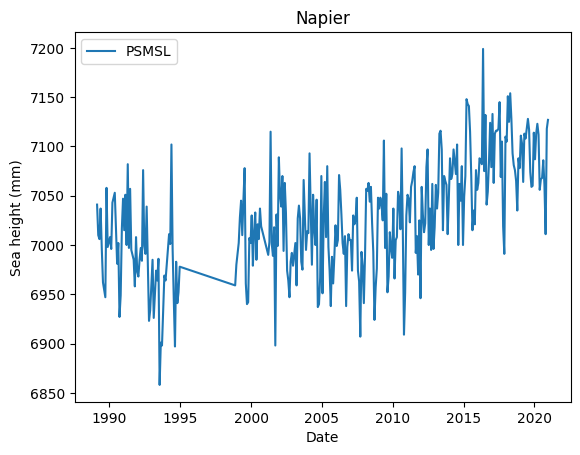

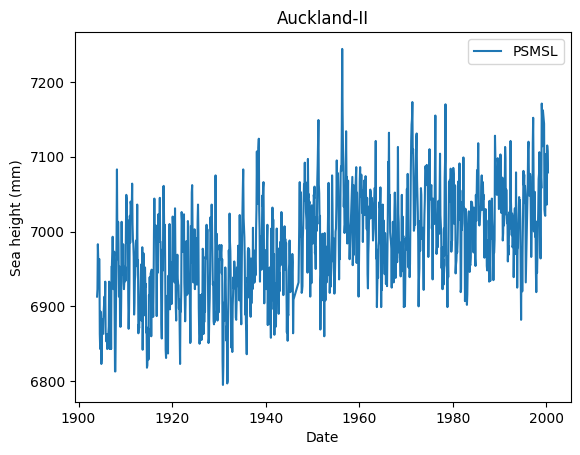

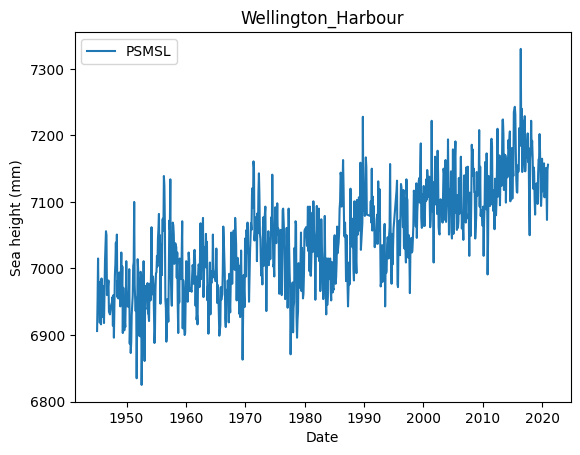

In [6]:
#NAPIER
napier = make_df(1750)
make_plot('Napier', napier)
#AUCKLAND
auck = make_df(150)
make_plot('Auckland-II', auck)
#WELLINGTON
well = make_df(221)
make_plot('Wellington_Harbour', well)

## South Island

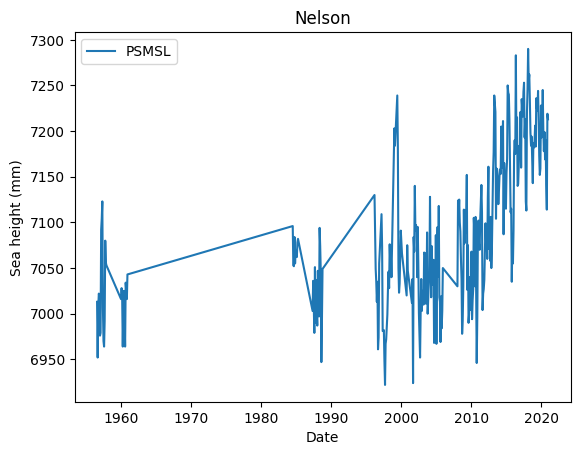

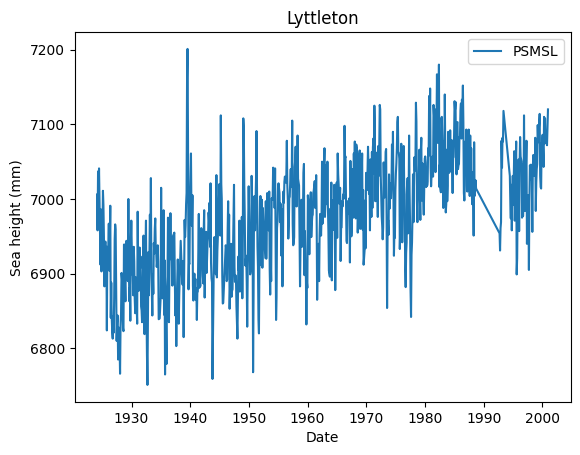

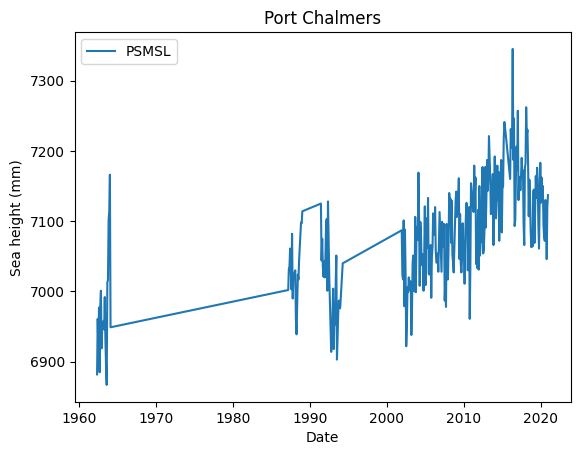

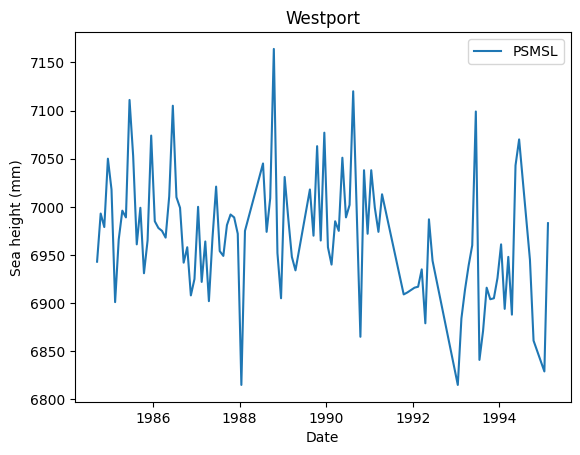

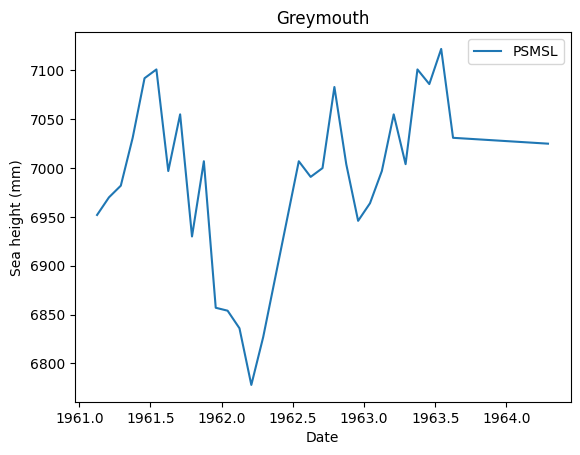

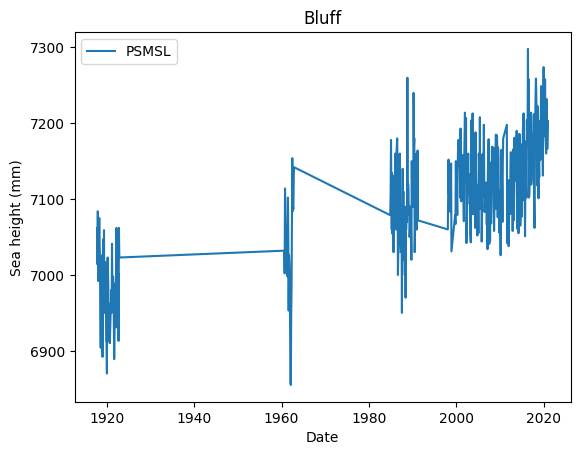

In [8]:
#NELSON
nelson=make_df(787)
make_plot('Nelson', nelson)
#LYTTLETON -- CHCH
lytt = make_df(259)
make_plot('Lyttleton', lytt)
#PORT CHALMERS - DUNEDIN
portc = make_df(998)
make_plot('Port Chalmers', portc)
#WESTPORT
westp = make_df(1004)
make_plot('Westport', westp)
#GREYMOUTH
grey = make_df(993)
make_plot('Greymouth', grey)
#BLUFF
bluff = make_df(213)
make_plot('Bluff', bluff)

# 21st century data (subset 2000-2020 data)

In [9]:
#data_new = only includes values from after timestamp >= 2000
napier_new=napier[napier.iloc[:,0]>=2000]
auck_new=auck[auck.iloc[:,0]>=2000]
well_new=well[well.iloc[:,0]>=2000]
nelson_new=nelson[nelson.iloc[:,0]>=2000]
bluff_new=bluff[bluff.iloc[:,0]>=2000]
portc_new=portc[portc.iloc[:,0]>=2000]
lytt_new=lytt[lytt.iloc[:,0]>=2000]

# LINEAR REGRESSION

In [14]:
import matplotlib.pyplot as plt
from scipy import stats

In [15]:
def plot_lr (data, name):
    sns.set_context('paper')
    x = data['Date']
    y = data['Sea height (mm)']
    res = stats.linregress(x,y)
    plt.plot(x,y,'o', label='Monthly mean')
    plt.plot(x, res.intercept+res.slope*x, 'r', linewidth = 3, label=str(round(res.slope, 3))+'mm/yr')
    plt.legend()
    plt.ylabel('Sea height (mm)')
    plt.xlabel('Date')
    plt.title(name);
    plt.savefig(name + '_lr.png',dpi=300)

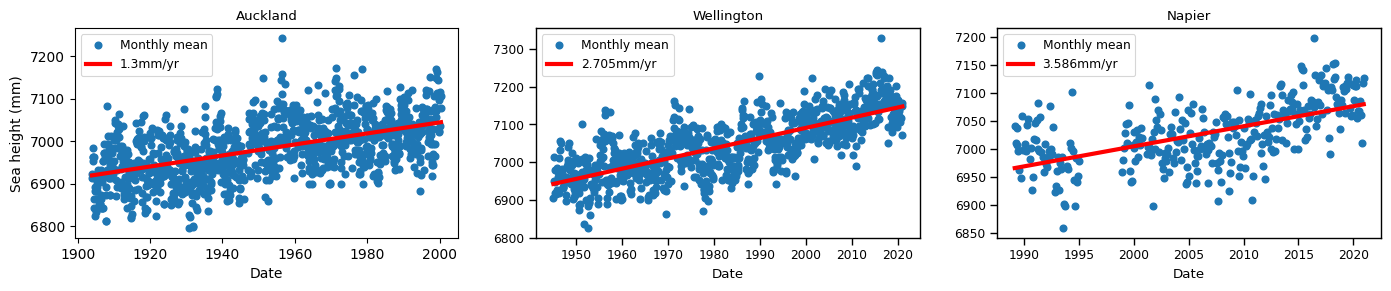

In [16]:
#NORTH ISLAND Linear Regression PLOTS
plt.rcParams["figure.figsize"] = (14,3)
plt.subplot(1, 3, 1)
plot_lr(auck, "Auckland")

plt.subplot(1, 3, 2)
plot_lr(well, "Wellington")
plt.ylabel(' ')

plt.subplot(1, 3, 3)
plot_lr(napier, "Napier")
plt.ylabel(' ')

plt.tight_layout()
plt.savefig('NI lr.png', dpi = 300)

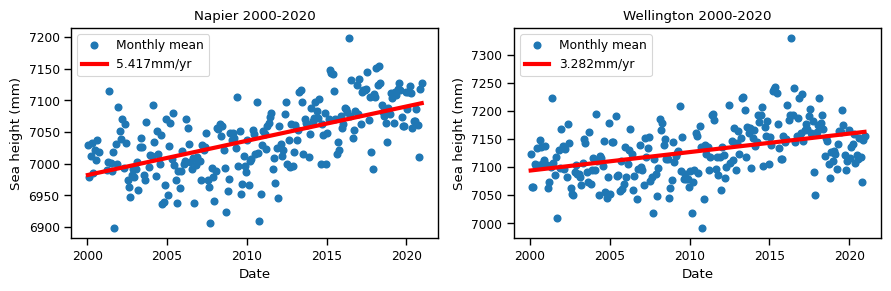

In [17]:
#NI 21st century:
#NORTH ISLAND Linear Regression PLOTS
plt.rcParams["figure.figsize"] = (9,3)
plt.subplot(1, 2, 1)
plot_lr(napier_new, "Napier 2000-2020")

plt.subplot(1, 2, 2)
plot_lr(well_new, "Wellington 2000-2020")
#plt.ylabel(' ')


plt.tight_layout()
plt.savefig('NI_21_lr.png', dpi = 300)

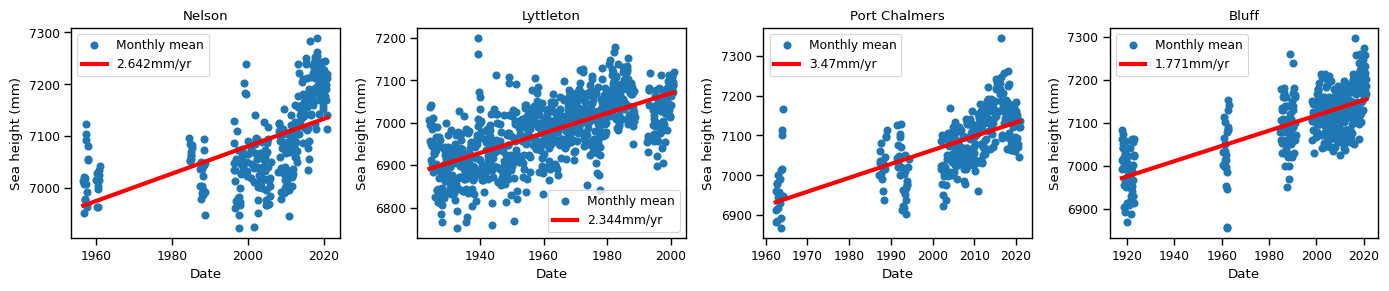

In [18]:
#South ISLAND Linear Regression PLOTS
plt.rcParams["figure.figsize"] = (14,3)
plt.subplot(1, 4, 1)
plot_lr(nelson, "Nelson")

plt.subplot(1, 4, 2)
plot_lr(lytt, "Lyttleton")
# plt.ylabel(' ')

plt.subplot(1, 4, 3)
plot_lr(portc, "Port Chalmers")
# plt.ylabel(' ')

plt.subplot(1, 4, 4)
plot_lr(bluff, "Bluff")
# plt.ylabel(' ')



plt.tight_layout()
plt.savefig('SI lr.png', dpi = 300)

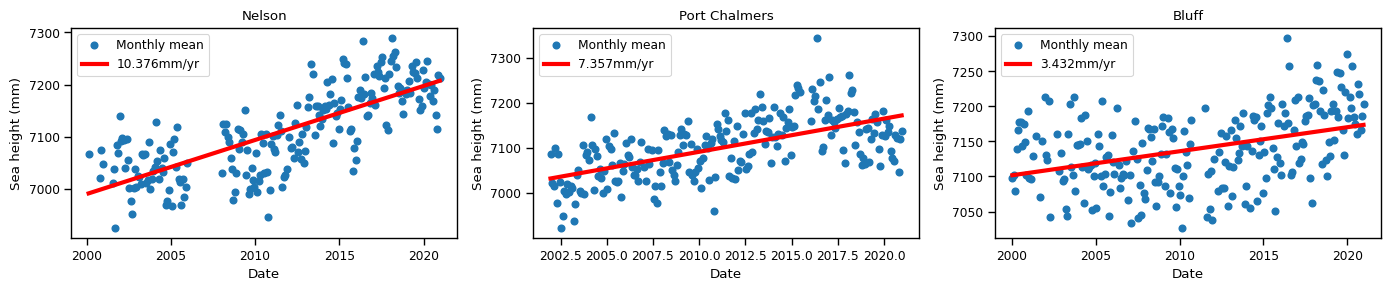

In [20]:
#SI 21st century:
#SOUTH ISLAND Linear Regression PLOTS

plt.rcParams["figure.figsize"] = (14,3)
plt.subplot(1, 3, 1)
plot_lr(nelson_new, "Nelson")

plt.subplot(1, 3, 2)
plot_lr(portc_new, "Port Chalmers")
# plt.ylabel(' ')

plt.subplot(1, 3, 3)
plot_lr(bluff_new, "Bluff")
# plt.ylabel(' ')



plt.tight_layout()
plt.savefig('SI lr_21.png', dpi = 300)


In [15]:
# Plots Linear Regression line, labeled with location and slope
def scipy_ln(data, name, pretty):
    x= data['Date']
    y = data['Sea height (mm)']
    res = stats.linregress(x,y)
    #plt.plot(x,y,'o', markersize=1,
             #label='Monthly mean'
    #        )
    plt.plot(x, res.intercept+res.slope*x, pretty, linewidth=3, label=name + ': '+ str(round(res.slope, 3))+'mm/yr')
    plt.legend(loc='best')
    plt.ylabel('Sea height (mm)')
    plt.xlabel('Date')
    plt.title(name);
    return res.slope


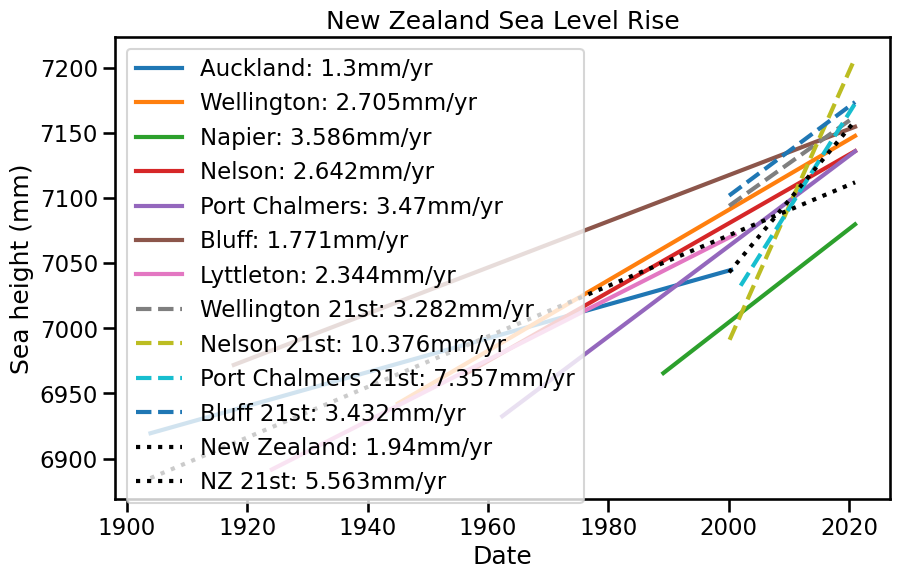

In [16]:
#sets larger figure size
plt.rcParams["figure.figsize"] = (10,6)

auck_ln = scipy_ln(auck, "Auckland", '-')
well_ln = scipy_ln(well, 'Wellington', '-')
napier_ln = scipy_ln(napier, 'Napier', '-')

nelson_ln = scipy_ln(nelson, 'Nelson', '-')
portc_ln = scipy_ln(portc, 'Port Chalmers', '-')
bluff_ln = scipy_ln(bluff, "Bluff", '-')
lytt_ln = scipy_ln(lytt, 'Lyttleton', '-')

well_new_ln = scipy_ln(well_new, 'Wellington 21st', '--')
neslon_new_ln= scipy_ln(nelson_new, 'Nelson 21st', '--')
portc_new_ln = scipy_ln(portc_new, 'Port Chalmers 21st', '--')
bluff_new_ln=scipy_ln(bluff_new, 'Bluff 21st', '--')

all_nz_ln = scipy_ln(all_nz, 'New Zealand', 'k:')
all_nz_ln_21 = scipy_ln(all_nz_21, 'NZ 21st', 'k:')
plt.title('New Zealand Sea Level Rise');
#plt.savefig('NZ_SLRISE.png', dpi = 300)


## Time Series with Seaborn

In [11]:
# Monster data set

#create new df from old df, adding location name in location column 
napier_nz = napier
napier_nz['Location'] = 'Napier'

auck_nz = auck
auck_nz['Location'] = "Auckland"

well_nz = well
well_nz["Location"] = 'Wellington'

nelson_nz = nelson
nelson_nz['Location'] = "Nelson"

lytt_nz = lytt
lytt_nz["Location"] = "Lyttleton"

portc_nz = portc
portc_nz["Location"] = "Port Chalmers"

bluff_nz = bluff
bluff_nz['Location'] = 'Bluff'

#combine all data frames into single dataframe named all_nz
frames = [auck_nz, napier_nz, well_nz, nelson_nz, lytt_nz, portc_nz, bluff_nz]
all_nz = pd.concat(frames, ignore_index=True)

In [12]:
#21st century data from all NZ stations
all_nz_21 =all_nz[all_nz.iloc[:,0]>=2000]

In [13]:
import seaborn as sns

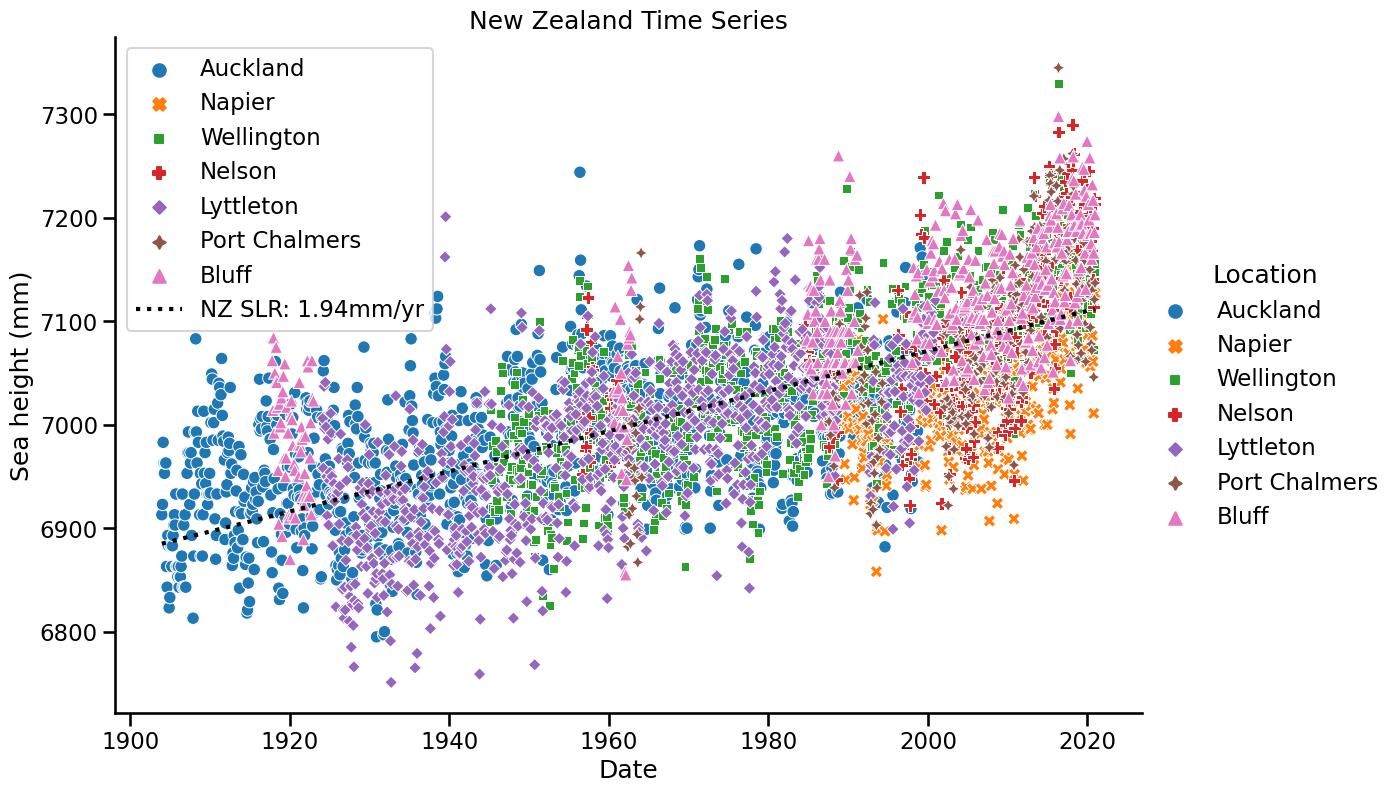

In [25]:
#plots time series of all data  -- scatterplot style
sns.set_context('talk')
ax = sns.relplot(
    data=all_nz,
    x="Date", y="Sea height (mm)",
    hue="Location", style="Location",height =8, aspect=1.5)
all_nz_ln = scipy_ln(all_nz, 'NZ SLR', 'k:')


plt.title('New Zealand Time Series')

plt.savefig('sns_all_nz_scatter.png', dpi=300)



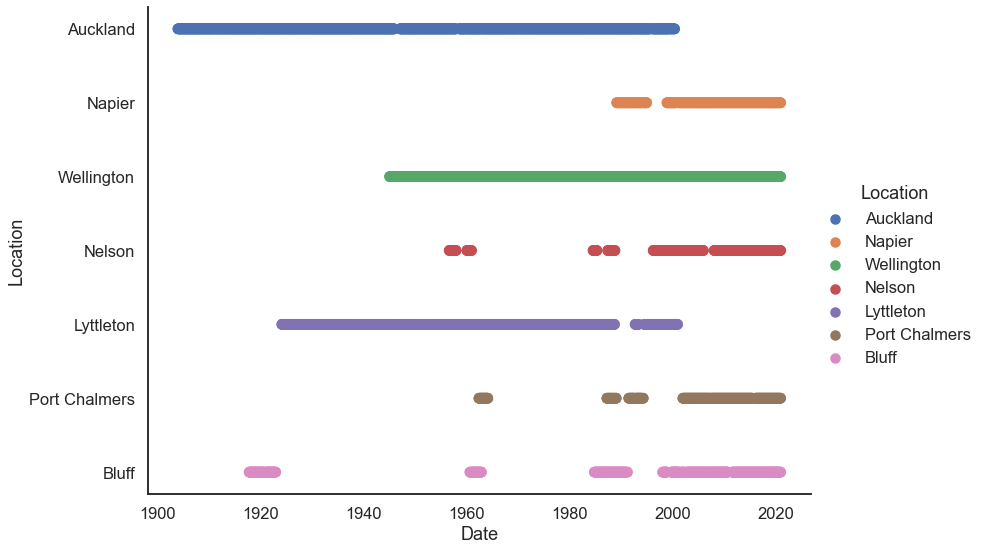

In [79]:
#pltos temporal coverage of station data 
sns.set_style("white")
sns.set_context("talk")
ax = sns.relplot(
    data=all_nz, 
    #kind="line",
    x="Date", y="Location", 
    hue="Location", height =8, aspect=1.5, 
    edgecolor=None,
    s=100
    #linewidth = 4
    )
plt.savefig('station_coverage.png', dpi=300)

# PSD

In [21]:
def psd_plot(data, name):
    #FS = 12 because monthly data, 12 months in a year
    plt.psd(data['Sea height (mm)'], detrend = 'linear', Fs = 12, label = name, alpha = 0.9);
    plt.title(name)
    plt.savefig(name +'_PSD.png', dpi = 100)

In [22]:
def clean_data(data):
    #separates year and month 
    data['year'] = data.Date.astype(str).str[:4]
    data['month'] = data.Date.astype(str).str[4:]
    #change from decimal year to month of year
    data['month'].loc[data['month']=='.0417']= 1
    data['month'].loc[data['month']=='.125']= 2
    data['month'].loc[data['month']=='.2083']= 3
    data['month'].loc[data['month']=='.2917']= 4
    data['month'].loc[data['month']=='.375']= 5
    data['month'].loc[data['month']=='.4583']= 6
    data['month'].loc[data['month']=='.5417']= 7
    data['month'].loc[data['month']=='.625']= 8
    data['month'].loc[data['month']=='.7083']= 9
    data['month'].loc[data['month']=='.7917']= 10
    data['month'].loc[data['month']=='.875']= 11
    data['month'].loc[data['month']=='.9583']= 12
    #add date column (Set as first of each month, even though would likely be 15)
    data['day'] = 1
    #make datetime
    data["Datetime"] = pd.to_datetime(data[['year', 'month', 'day']])    
    #create new dataframe with just parts that we want:
    data = data[['Datetime', 'Sea height (mm)']]
    data = data.set_index('Datetime')
    
    #resample monthly start
    data = data.resample('MS').asfreq()
    #fil in NaN values
    data = data.interpolate()
    
    return data#BLUFF 2000-2020

    

In [23]:
# AUCKLAND 1904 - 2000
auck_clean = auck[auck.iloc[:,0]>=1904] 
auck_clean = auck_clean[auck_clean.iloc[:,0]<1999]
auck_clean = clean_data(auck_clean)

# Napier 1990-2020 
napier_clean = napier[napier.iloc[:,0]>=2000] 
napier_clean = napier_clean[napier_clean.iloc[:,0]<2020]
napier_clean = clean_data(napier_clean)


# Wellington 1945 - 2020
well_clean = well[well.iloc[:,0]>=1945] 
well_clean = well_clean[well_clean.iloc[:,0]<2020]
well_clean = clean_data(well_clean)


#NELSON: 2008- 2020 : should be 144items
nel_21 = nelson[nelson.iloc[:,0]>=2008] 
nel_21 = nel_21[nel_21.iloc[:,0]<2020]
nel_21_clean = clean_data(nel_21)

#LYTTLETON: 1925 - 1988 : should be 756 items
lytt_88 = lytt[lytt.iloc[:,0]>=1925] 
lytt_88 = lytt_88[lytt_88.iloc[:,0]<1988]
lytt_88_clean = clean_data(lytt_88)


#PORT CHALMERS: 2002 - 2020 : should be 756 items
portc_21 = portc[portc.iloc[:,0]>=2002] 
portc_21 = portc_21[portc_21.iloc[:,0]<2020]
portc_21_clean = clean_data(portc_21)

#BLUFF 2000-2020
bluff_21 = bluff[bluff.iloc[:,0]>=2000] 
bluff_21 = bluff_21[bluff_21.iloc[:,0]<2020]
bluff_clean_21 = clean_data(bluff_21)






/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


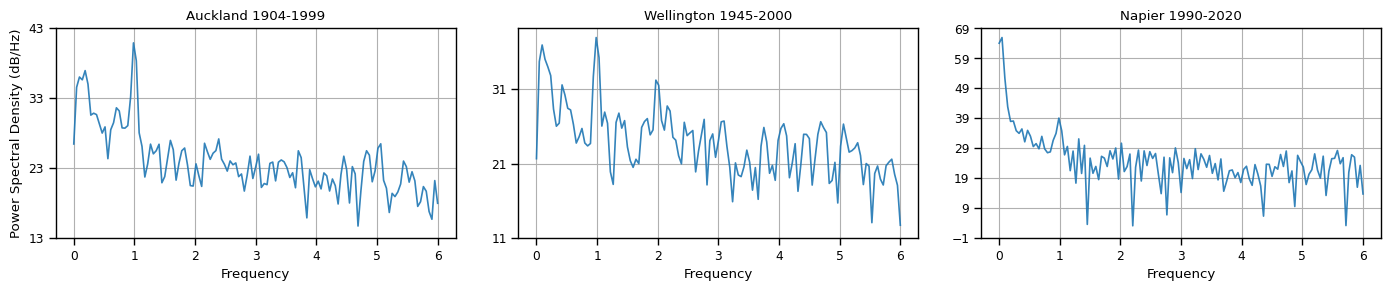

In [24]:
#NORTH ISLAND PSD PLOTS
plt.rcParams["figure.figsize"] = (14,3)
plt.subplot(1, 3, 1)
psd_plot(auck_clean, "Auckland 1904-1999")

plt.subplot(1, 3, 2)
psd_plot(well_clean, "Wellington 1945-2000")
plt.ylabel(' ')

plt.subplot(1, 3, 3)
psd_plot(napier_clean, "Napier 1990-2020")
plt.ylabel(' ')

plt.tight_layout()
plt.savefig('NI PSD.png', dpi = 300)

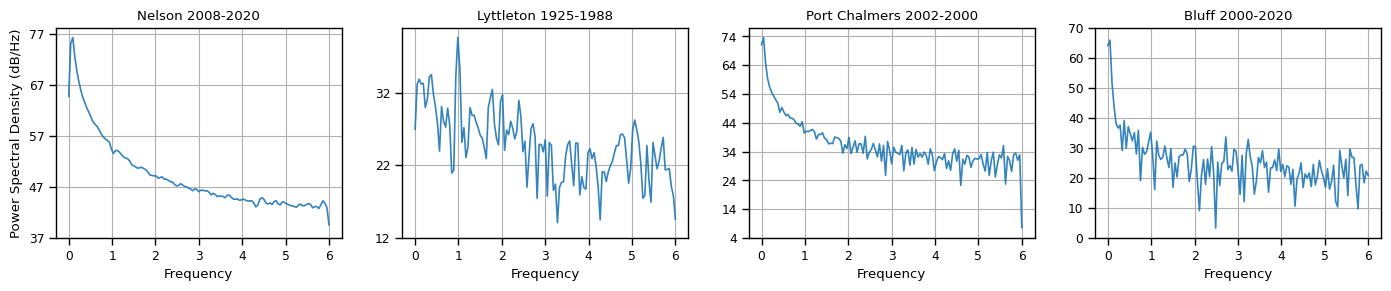

In [25]:
#SOUTHISLAND PSD PLOTS
plt.rcParams["figure.figsize"] = (14,3)
plt.subplot(1, 4, 1)
psd_plot(nel_21_clean, "Nelson 2008-2020")

plt.subplot(1, 4, 2)
psd_plot(lytt_88_clean, "Lyttleton 1925-1988")
plt.ylabel(' ')

plt.subplot(1, 4, 3)
psd_plot(portc_21_clean, "Port Chalmers 2002-2000")
plt.ylabel(' ')

plt.subplot(1, 4, 4)
psd_plot(bluff_clean_21, "Bluff 2000-2020")
plt.ylabel(' ')

plt.tight_layout()
plt.savefig('SI PSD.png', dpi =300)

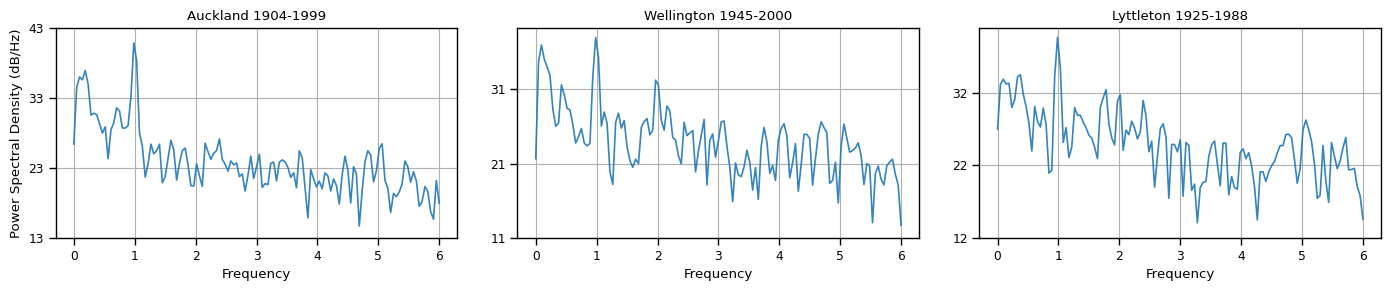

In [26]:
#LONG TERM PSD PLOTS
plt.rcParams["figure.figsize"] = (14,3)
plt.subplot(1, 3, 1)
psd_plot(auck_clean, "Auckland 1904-1999")

plt.subplot(1, 3, 2)
psd_plot(well_clean, "Wellington 1945-2000")
plt.ylabel(' ')

plt.subplot(1, 3, 3)
psd_plot(lytt_88_clean, "Lyttleton 1925-1988")
plt.ylabel(' ')

plt.tight_layout()
plt.savefig('LT PSD.png', dpi = 300)

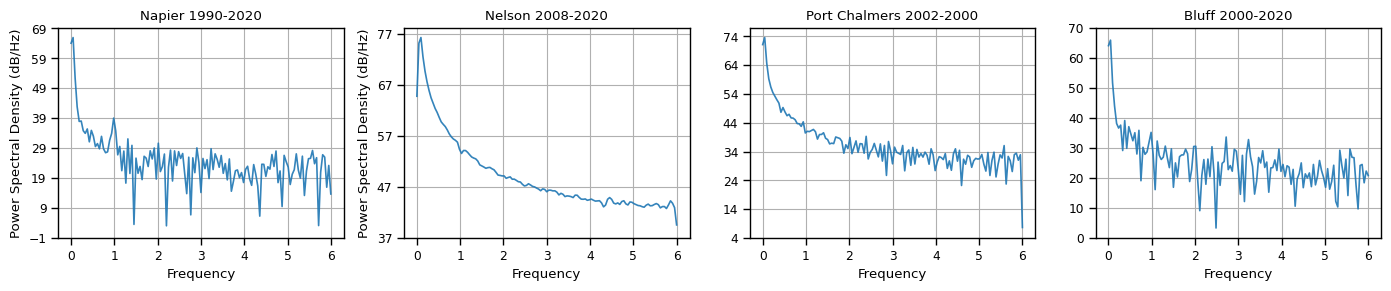

In [27]:
#SHORT TERM PSD PLOTS
plt.rcParams["figure.figsize"] = (14,3)

plt.subplot(1, 4, 1)
psd_plot(napier_clean, "Napier 1990-2020")

plt.subplot(1, 4, 2)
psd_plot(nel_21_clean, "Nelson 2008-2020")

plt.subplot(1, 4, 3)
psd_plot(portc_21_clean, "Port Chalmers 2002-2000")
plt.ylabel(' ')

plt.subplot(1, 4, 4)
psd_plot(bluff_clean_21, "Bluff 2000-2020")
plt.ylabel(' ')



plt.tight_layout()
plt.savefig('ST PSD.png', dpi =300)

# Look for flood events

Decimal year dates
* January =  .0417            
* February =  .1250            
* March =   .2083            
* April =   .2917            
* May =  .3750            
* June =  .4583             
* July = .5417            
* August = .6250          
* Sept =   .7083             
* Oct =  .7917             
* Nov =  .8750           
* Dec =   .9583

(2000.0, 2020.0)

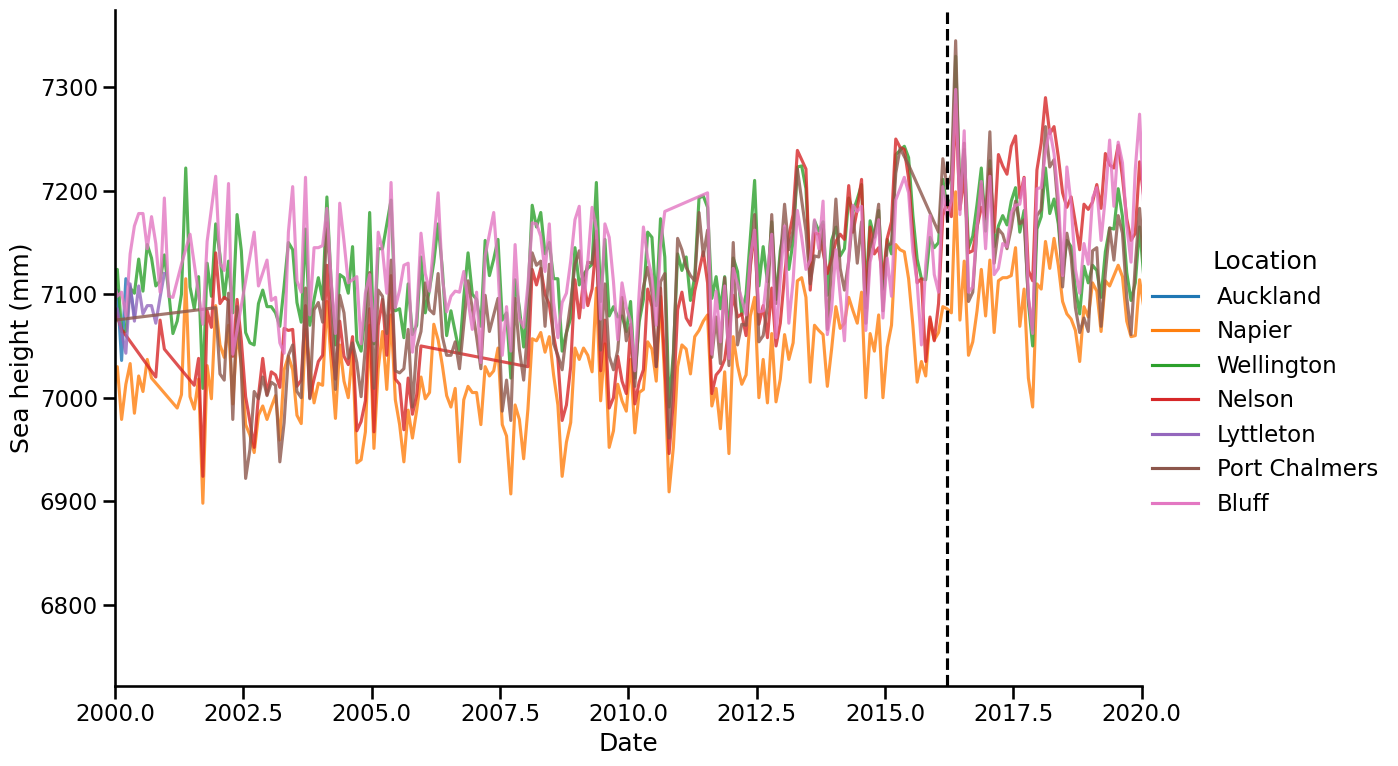

In [34]:
data = all_nz
sns.set_context('talk')
ax = sns.relplot(
    data=data, kind="line",
    x="Date", y="Sea height (mm)",height =8, aspect=1.5, alpha=0.8,
    hue="Location")

#march 2016 data piont = 2016.2083
plt.axvline(x=2016.2083, color='k',linestyle = '--')


plt.xlim(2000, 2020)

# Look at Earthquakes

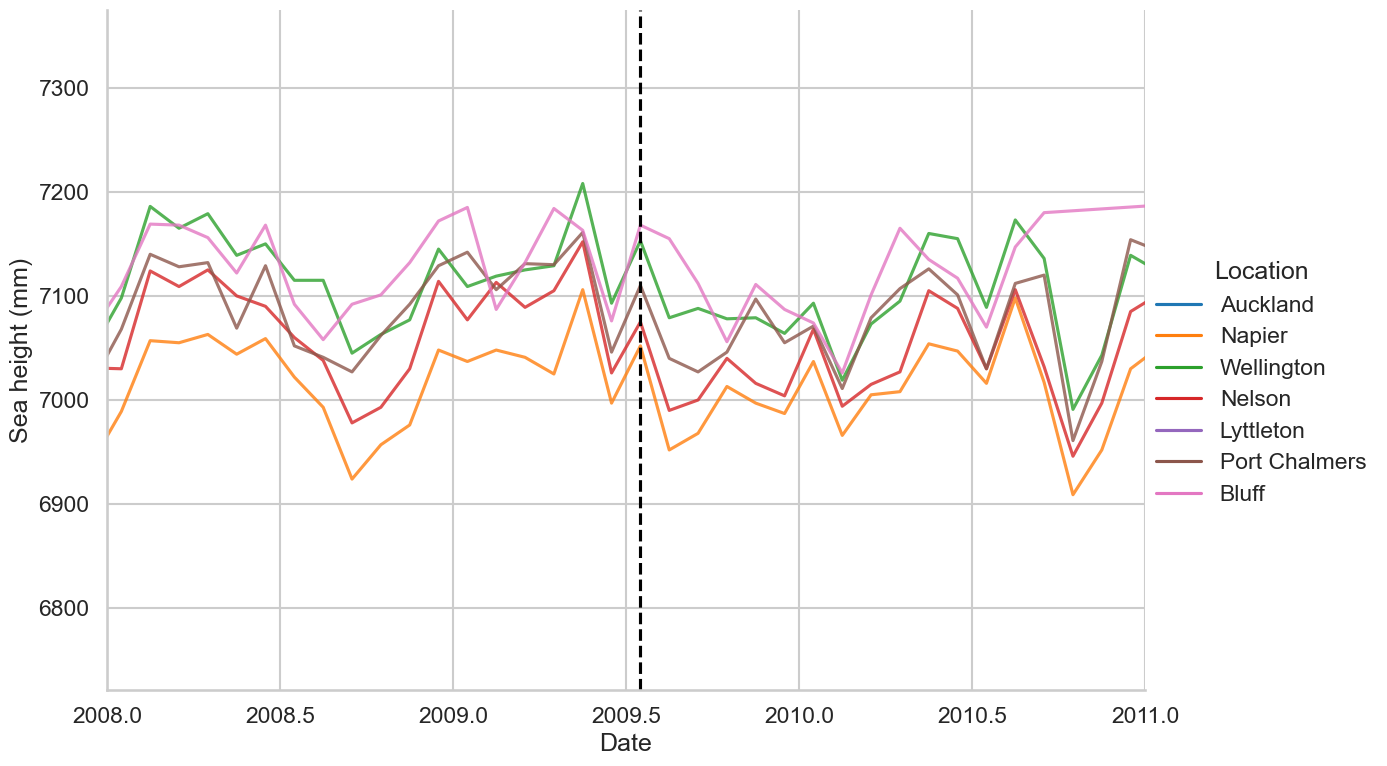

In [281]:
data = all_nz
si = ['Bluff', 
      'Nelson', 
      'Port Chalmers',
      'Lyttleton', 
      'Auckland',
      "Wellington", 
      'Napier']
sns.set_context('talk')
sns.set_style('whitegrid')
ax = sns.relplot(
    data=data.loc[data.Location.isin(si)], 
    kind="line",
    x="Date", y="Sea height (mm)",height =8, aspect=1.5, alpha=0.8,
    hue="Location")

#Dusky Sound Earthquake July 2009
#July 2009 = 2009.5417
plt.axvline(x=2009.5417, color='k', linestyle = '--')


plt.xlim(2008, 2011)
plt.savefig('Dusky_EQ_09.png', dpi = 300)

# LOCATION MAP

In [28]:
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy

import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib
import matplotlib.patheffects as patheffects
import math

In [29]:
###Scale bar###

def scale_bar(ax, length=None, location=(0.5, 0.05), linewidth=2):
    """
    ax is the axes to draw the scalebar on.
    length is the length of the scalebar in km.
    location is center of the scalebar in axis coordinates.
    (ie. 0.5 is the middle of the plot)
    linewidth is the thickness of the scalebar.
    """
    #Get the limits of the axis in lat long
    llx0, llx1, lly0, lly1 = ax.get_extent(ccrs.PlateCarree())
    #Make tmc horizontally centred on the middle of the map,
    #vertically at scale bar location
    sbllx = (llx1 + llx0) / 2
    sblly = lly0 + (lly1 - lly0) * location[1]
    tmc = ccrs.TransverseMercator(sbllx, sblly)
    #Get the extent of the plotted area in coordinates in metres
    x0, x1, y0, y1 = ax.get_extent(tmc)
    #Turn the specified scalebar location into coordinates in metres
    sbx = x0 + (x1 - x0) * location[0]
    sby = y0 + (y1 - y0) * location[1]
    

    buffer = [patheffects.withStroke(linewidth=3, foreground="w")]


    #Calculate a scale bar length if none has been given
    #(Theres probably a more pythonic way of rounding the number but this works)
    if not length: 
        length = (x1 - x0) / 5000 #in km
        ndim = int(np.floor(np.log10(length))) #number of digits in number
        length = round(length, -ndim) #round to 1sf
        #Returns numbers starting with the list
        def scale_number(x):
            if str(x)[0] in ['1', '2', '5']: return int(x)        
            else: return scale_number(x - 10 ** ndim)
        length = scale_number(length) 

    #Generate the x coordinate for the ends of the scalebar
    bar_xs = [sbx - length * 500, sbx + length * 500]
    #Plot the scalebar
    ax.plot(bar_xs, [sby, sby], transform=tmc, color='k', linewidth=linewidth, path_effects=buffer, zorder=2)
    #Plot the scalebar label
    ax.text(sbx, sby, str(length) + ' km', transform=tmc,
            horizontalalignment='center', verticalalignment='bottom', fontsize = 15, path_effects=buffer, zorder=2)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mlin

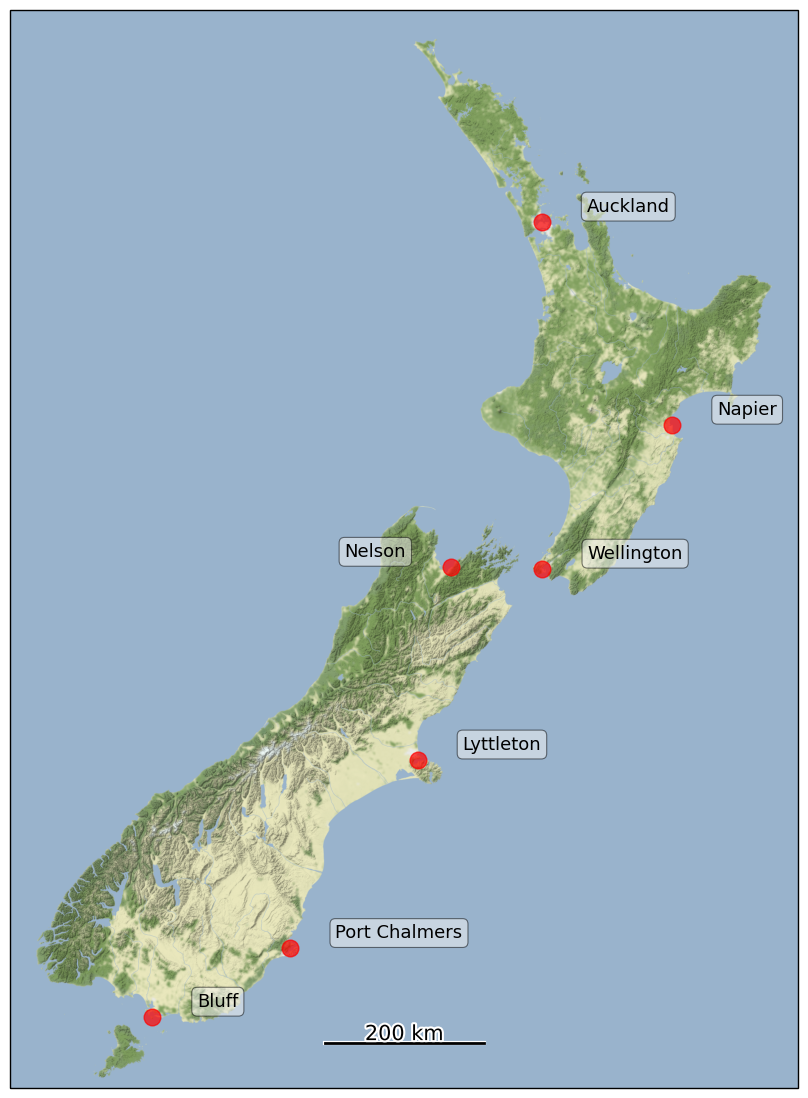

In [29]:
loc_dict = {'Auckland': [-36.843, 174.769],
            'Napier': [-39.476, 176.920],
           "Wellington": [-41.284, 174.780],
           "Lyttleton":[-43.606, 172.722],
           'Port Chalmers': [-45.8147, 170.62414],
           'Bluff':[-46.598, 168.345],
          #'Nelson':[-41.261, 173.273]
           }


# Create a Stamen terrain background instance.
stamen_terrain = cimgt.Stamen('terrain-background')

fig = plt.figure(figsize=(14,14))

# Create a GeoAxes in the tile's projection.
ax = fig.add_subplot(1, 1, 1, projection=stamen_terrain.crs)

# Limit the extent of the map to a small longitude/latitude range.
ax.set_extent([166, 179, -47.4, -34], crs=ccrs.Geodetic())

# Add the Stamen data at zoom level 8.
ax.add_image(stamen_terrain, 8)

geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
text_transform = offset_copy(geodetic_transform, units='dots', x=+15*3, y=+5*3)

text_transform2 = offset_copy(geodetic_transform, units='dots', x=-15*3, y=+5*3)

# Add a marker for the tide gauges 
for loc in loc_dict:
    
    loc = loc
    lat = loc_dict[loc][0]
    lon = loc_dict[loc][1]
    ax.plot(lon, lat, marker ='o', color='red', markersize=12, alpha=0.7, transform=ccrs.Geodetic())
    
    ax.text(lon, lat, loc, verticalalignment='center', horizontalalignment='left', fontsize=13,
        transform=text_transform,
        bbox=dict(facecolor='whitesmoke', alpha=0.5, boxstyle='round'))
    
#add marker and label for Nelson so that it doesn't overlap with Wellington
ax.plot(173.273, -41.261, marker ='o', color='red', markersize=12, alpha=0.7, transform=ccrs.Geodetic())
    
ax.text(173.273, -41.261, "Nelson", verticalalignment='center', horizontalalignment='right', fontsize=13,
        transform=text_transform2,
        bbox=dict(facecolor='whitesmoke', alpha=0.5, boxstyle='round'))

#add scale bar (using definition above, length set to 200km)
scale_bar(ax, length= 200)

plt.savefig('NZ_map.png',dpi=300)


# Sea level rise rate by location

## long-term (full range) sea level rise

In [30]:
#this plots all full-range (long term) trends
nz_sls_data = {'Location':['Auckland', 'Napier', "Wellington", 'Lyttleton', 'Port Chalmers', 'Bluff', 'Nelson', 'blank'],
              'Latitude':[-36.843, -39.476, -41.284, -43.606, -45.8147, -46.498, -41.261, -41.421] , 
               'Longitude': [174.769, 176.920, 174.480, 172.722, 170.62414, 168.345 ,173.273, 173.273], 
               'slr':[1.3,3.586,2.705,2.344,3.47,1.771,2.642, 0]}
nz_data = pd.DataFrame(data=nz_sls_data)

In [30]:
from matplotlib import colorbar, colors

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mlin

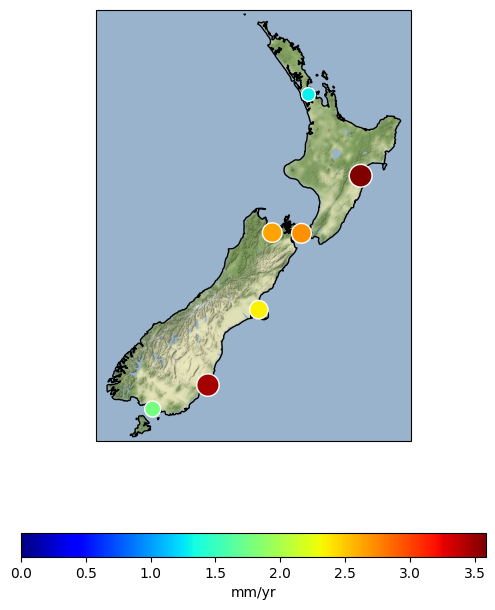

In [31]:
matplotlib.rc_file_defaults()
import cartopy.crs as crs
fig = plt.figure(figsize = (6,8))
stamen_terrain = cimgt.Stamen('terrain-background')
ax = fig.add_subplot(1,1,1,projection=stamen_terrain.crs)

ax.coastlines()
ax.set_extent([166, 179, -47.4, -34], crs = crs.PlateCarree())
ax.add_image(stamen_terrain, 6)
cb = plt.scatter(x = nz_data.Longitude, y=nz_data.Latitude, c=nz_data.slr, s = nz_data.slr*75, edgecolors='white',
                 cmap='jet',
            transform = crs.PlateCarree())

cbar = plt.colorbar(cb, cmap='jet', orientation='horizontal',ticklocation='auto')
cbar.set_label('mm/yr')
plt.savefig('NI_full_slr.png',dpi=300)

## short -term (21st century) sea level rise

In [315]:
## this is 21st century  (short-term) trends 
nz_st_data = {'Location':[ 'Napier', "Wellington", 'Port Chalmers', 'Bluff', 'Nelson', 'blank'],
              'Latitude':[ -39.476, -41.284, -45.8147, -46.498, -41.261, -41.261] , 
               'Longitude': [ 176.920, 174.480, 170.62414, 168.345 ,173.273, 173.273], 
               'slr':[5.417,3.282,7.357,3.432,10.376, 0]}
nz_st_data = pd.DataFrame(data=nz_st_data)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mlin

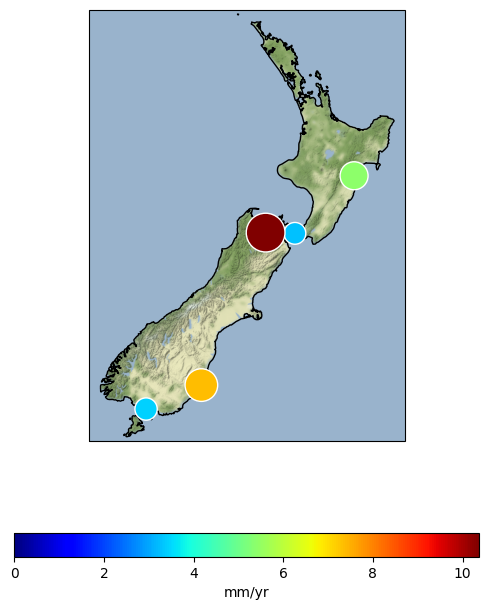

In [309]:
matplotlib.rc_file_defaults()
import cartopy.crs as crs
fig = plt.figure(figsize = (6,8))
stamen_terrain = cimgt.Stamen('terrain-background')
ax = fig.add_subplot(1,1,1,projection=stamen_terrain.crs)

ax.coastlines()
ax.set_extent([166, 179, -47.4, -34], crs = crs.PlateCarree())
ax.add_image(stamen_terrain, 6)
cb = plt.scatter(x = nz_st_data.Longitude, y=nz_st_data.Latitude, c=nz_st_data.slr, s = nz_st_data.slr*75, edgecolors='white',
                 cmap='jet',
            transform = crs.PlateCarree())

cbar = plt.colorbar(cb, cmap='jet', orientation='horizontal',ticklocation='auto')
cbar.set_label('mm/yr')
plt.savefig('NI_full_slr.png',dpi=300)